In [76]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

## Create interactive plots
#%matplotlib notebook  
## Create static inline plots
%matplotlib inline      

style.use("ggplot")

start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)

df = web.DataReader("TSLA", "yahoo", start, end)
filename = "tesla.csv"
df.to_csv(filename)

df1 = pd.read_csv(filename, parse_dates=True, index_col=0)
print(df1.head())

                 Open   High        Low      Close    Volume  Adj Close
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999
2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999
2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001
2010-07-06  20.000000  20.00  15.830000  16.110001   6866900  16.110001


In [41]:
print(df.tail(10))

                  Open        High         Low       Close   Volume  \
Date                                                                  
2016-12-16  198.080002  202.589996  197.600006  202.490005  3796900   
2016-12-19  202.490005  204.449997  199.839996  202.729996  3488100   
2016-12-20  203.050003  209.000000  202.500000  208.789993  4689100   
2016-12-21  208.449997  212.229996  207.410004  207.699997  5207600   
2016-12-22  208.220001  209.990005  206.500000  208.449997  3111100   
2016-12-23  208.000000  213.449997  207.710007  213.339996  4670500   
2016-12-27  214.880005  222.250000  214.419998  219.529999  5915700   
2016-12-28  221.529999  223.800003  217.199997  219.740005  3782500   
2016-12-29  218.559998  219.199997  214.119995  214.679993  4045000   
2016-12-30  216.300003  217.500000  211.679993  213.690002  4642600   

             Adj Close  
Date                    
2016-12-16  202.490005  
2016-12-19  202.729996  
2016-12-20  208.789993  
2016-12-21  207.699997

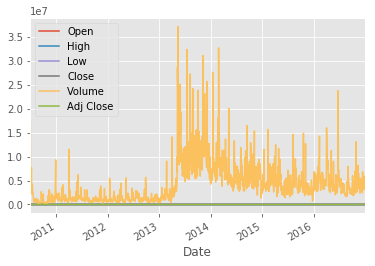

In [42]:
df.plot()
plt.show()

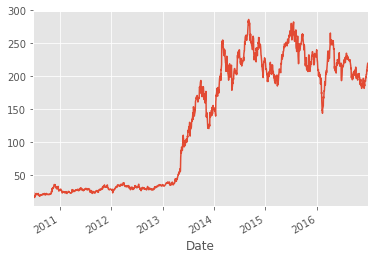

In [43]:
df.keys()
df['Adj Close'].plot()

### Create a new column in Pandas


                 Open   High        Low      Close    Volume  Adj Close  100ma
Date                                                                          
2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999    NaN
2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000    NaN
2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999    NaN
2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001    NaN
2010-07-06  20.000000  20.00  15.830000  16.110001   6866900  16.110001    NaN
                 Open   High        Low      Close    Volume  Adj Close  \
Date                                                                      
2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999   
2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000   
2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999   
2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001 

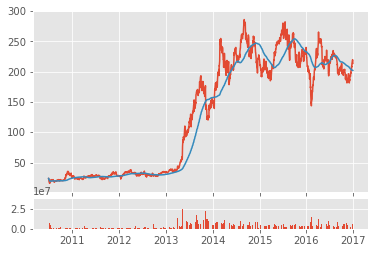

In [46]:
df["100ma"] = df["Adj Close"].rolling(window = 100).mean() ## NA if there aren't 100 data points
print(df.head())

## min_periods 0, says take the average of as many data points as you have
df["100ma"] = df["Adj Close"].rolling(window = 100, min_periods = 0).mean() 
print(df.head())

df.dropna(inplace=True) ## Change the existing data frame instead of returning a new one
print(df.head())

numOfRows = 6
numOfColumns = 1
ax1 = plt.subplot2grid((numOfRows, numOfColumns), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((numOfRows, numOfColumns), (5,0), rowspan=1, colspan=1, sharex=ax1) ## sharex means that interactive zooming zooms both plots

ax1.plot(df.index, df["Adj Close"])
ax1.plot(df.index, df["100ma"])
ax2.bar(df.index, df["Volume"]) 

plt.show()

### Resampling
Take some information and sample it at different frequencies. 

Let's say that the data comes in at random intervals and you want to resample it to a particular round interval (e.g. per hour).

                 open       high        low      close
Date                                                  
2010-06-29  23.889999  23.889999  15.800000  17.459999
2010-07-09  17.400000  20.639999  17.049999  20.639999
2010-07-19  21.910000  21.910000  20.219999  20.719999
2010-07-29  20.350000  21.950001  19.590000  19.590000
2010-08-08  19.600000  19.600000  17.600000  19.150000


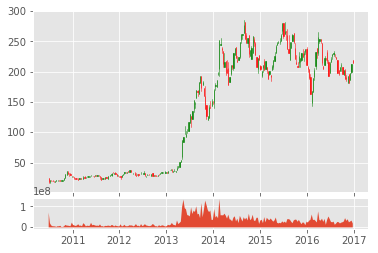

In [55]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

df_ohlc = df["Adj Close"].resample("10D").ohlc()
df_volume = df["Volume"].resample("10D").sum()
print(df_ohlc.head())

df_ohlc.reset_index(inplace=True)
df_ohlc["Date"] = df_ohlc["Date"].map(mdates.date2num)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=5, colspan=1, sharex = ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup="g")
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

### Get the S&P 500 company data

['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'AGN', 'LNT', 'ALXN', 'ALLE', 'ADS', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANTM', 'AON', 'APA', 'AIV', 'AAPL', 'AMAT', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AN', 'AZO', 'AVB', 'AVY', 'BHI', 'BLL', 'BAC', 'BK', 'BCR', 'BAX', 'BBT', 'BDX', 'BBBY', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CPB', 'COF', 'CAH', 'CBOE', 'HSIC', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'COH', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE'

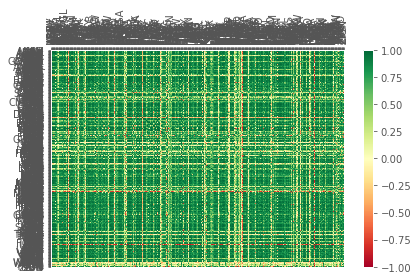

In [79]:
import bs4 as bs
import pickle  ## Serializes any type of object
import requests
import time ## throtle requests
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

def save_sp500_tickers():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    resp = requests.get(url)
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find("table", {"class":"wikitable sortable"})
    tickers = []
    for row in table.findAll("tr")[1:]: ## first row is the header
        ticker = row.findAll("td")[0].text ## pick the leftmost column
        tickers.append(ticker)
    
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
        
    
    return tickers

ts = save_sp500_tickers()
print(ts)
    
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        ts = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            ts = pickle.load(f)
            
    if not os.path.exists("stock_dfs"):
        os.makedirs("stock_dfs")
    start = dt.datetime(1990, 1, 1)
    end = dt.datetime(2017,3, 7)
    
    for ticker in ts:
        csv_filename = "stock_dfs/{}.csv".format(ticker)
        if not os.path.exists(csv_filename):
            time.sleep(1)
            ticker = ticker.replace(".", "-")
            print("Downloading {}".format(ticker))
            try:
                df = web.DataReader(ticker, "yahoo", start, end)
                df.to_csv(csv_filename)
            except:
                print("Unable to download {}".format(ticker))
        else:
            print("Already have {}".format(ticker))

#get_data_from_yahoo()

def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame()
    for count, ticker in enumerate(tickers):
        csv_filename = "stock_dfs/{}.csv".format(ticker)
        if not os.path.exists(csv_filename):
            print("Unable to find file {}".format(csv_filename))
            continue
        
        df = pd.read_csv(csv_filename)
        df.set_index("Date", inplace=True)
        
        df.rename(columns = {"Adj Close": ticker}, inplace=True)
        df.drop(["Open", "High", "Low", "Close", "Volume"], 1, inplace=True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how="outer")
        
        if count % 10 == 0:
            print(count)
            
    main_df.to_csv("sp500-all.csv")
    return main_df

if not os.path.exists("sp500-all.csv"):
    main_df = compile_data()
else:
    main_df = pd.read_csv("sp500-all.csv", parse_dates=True, index_col=0)


def visualize_data(d):
    df_corr = d.corr()    
    
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index 
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    pp = PdfPages('cor.pdf')
    pp.savefig()
    plt.show()
    pp.close()
    
    #fig.savefig("cor.pdf", bbox_inches="tight")
    

    
visualize_data(main_df)

    

In [4]:
from collections import Counter
import numpy as np
import pandas as pd
import pickle
from sklearn import svm, cross_validation, neighbors, model_selection
from sklearn.ensemble import VotingClassifier, RandomForestClassifier 

def process_data_for_labels(ticker):
    hm_days = 7   # how many days in the future are looking?
    df = pd.read_csv("sp500-all.csv", parse_dates=True, index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1, hm_days+1):
        df["{}_{}d".format(ticker, i)] = ((df[ticker].shift(-i)) / df[ticker]) - 1
        
    df.fillna(0, inplace=True)    
    
    return tickers, df


def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)
    df["{}_target".format(ticker)] = list(map(buy_sell_hold,
                                              df["{}_1d".format(ticker)], 
                                              df["{}_2d".format(ticker)], 
                                              df["{}_3d".format(ticker)], 
                                              df["{}_4d".format(ticker)], 
                                              df["{}_5d".format(ticker)], 
                                              df["{}_6d".format(ticker)], 
                                              df["{}_7d".format(ticker)]                                              
                                             ))
    vals = df["{}_target".format(ticker)].values.tolist()
    
    str_vals = [str(i) for i in vals]
    print("Data spread:", Counter(str_vals))
          
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    X = df_vals.values
    y = df["{}_target".format(ticker)].values
    
    return X, y, df

    

def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25)
    
    #clf = neighbors.KNeighborsClassifier()
    clf = VotingClassifier([("Linear S", svm.LinearSVC()),
                            ("knn", neighbors.KNeighborsClassifier()),
                            ("rfc", RandomForestClassifier())])
    
    
    clf.fit(X_train, y_train)
    
    confidence = clf.score(X_test, y_test)
    print("Confidence: ", confidence)
    predictions = clf.predict(X_test)
    print("Predicted spread: ", Counter(predictions))
    
    return confidence
    
extract_featuresets("XOM")
        
        
do_ml("BAC")

Data spread: Counter({'1': 2736, '-1': 2212, '0': 1901})
Data spread: Counter({'1': 3069, '-1': 2690, '0': 1090})
Confidence:  0.422066549912
Predicted spread:  Counter({1: 900, -1: 788, 0: 25})


0.42206654991243431